In [1]:
#-- Draw anomalies for 1997 and 1998
# idir = "/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/20*.nc"
%matplotlib inline
import os
import pandas as pd
from netCDF4 import  num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

import os
os.getcwd()

%cd /home/599/ars599/Documents/a10/

import glob
print(glob.glob("/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-1899*mon.nc"))


/home/599/ars599/Documents/a10
['/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189905_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189910_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189903_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189901_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189904_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189902_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189911_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189909_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189907_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-1899

In [2]:
import glob
import xarray as xr
from datetime import datetime

# List all matching files
path_of_the_directory = '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/'
ext = ('mon.nc')
        
sst = []
for files in os.listdir(path_of_the_directory):
    if files.endswith(ext):
        file = path_of_the_directory+files
        print (file)
        vTmp   = xr.open_dataset(file)['fld_s00i024']
        sst.append(vTmp)


/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-185710_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-188103_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-186109_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-185607_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189905_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189205_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-185005_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-187712_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-185002_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-187910_mon.nc
/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-

In [3]:
# batter save the previous variable in to two files (00 and 02)
# to make the workshop easier and can share these two files

[ntim,nlev,nlat,nlon]=np.shape(sst)
sst_all = xr.concat(sst, dim='time')

In [4]:
fn = 'sst_HI-02_output.nc'
sst_all.to_netcdf(fn, "w", format="NETCDF4")

In [6]:
sst_clim = sst_all.groupby('time.month').mean(dim='time')
sst_anom = sst_all.groupby('time.month') - sst_clim

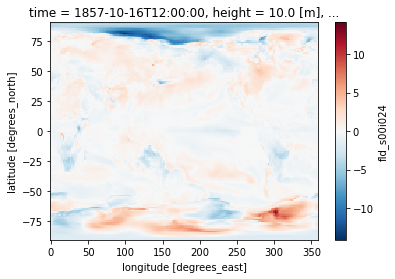

In [7]:
%matplotlib inline
sst_anom[0].plot()

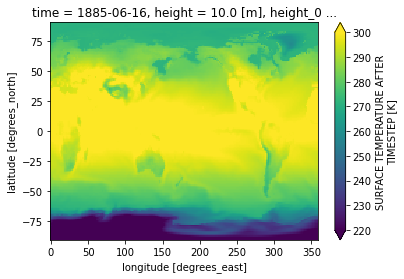

In [9]:
sst_all.sel(time='1885-06-16').plot(vmin=220, vmax=300)

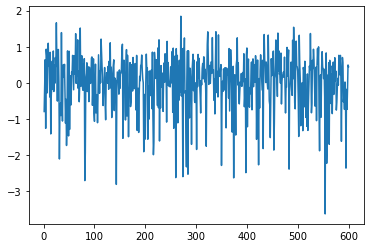

In [10]:
x = list(range(1, 601))
y=sst_anom.time
plt.plot( x,sst_anom.sel(lon=180, lat=0).transpose() )

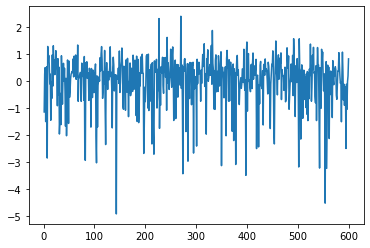

In [11]:
sst_ref = sst_anom.sel(lon=200, lat=0, method='nearest')
plt.plot(x, sst_ref)

In [12]:
# -- regional average
def wgt_areaave(indat, latS, latN, lonW, lonE):
  lat=indat.lat
  lon=indat.lon

  if ( ((lonW < 0) or (lonE < 0 )) and (lon.values.min() > -1) ):
     anm=indat.assign_coords(lon=( (lon + 180) % 360 - 180) )
     lon=( (lon + 180) % 360 - 180)
  else:
     anm=indat

  iplat = lat.where( (lat >= latS ) & (lat <= latN), drop=True)
  iplon = lon.where( (lon >= lonW ) & (lon <= lonE), drop=True)

#  print(iplat)
#  print(iplon)
  wgt = np.cos(np.deg2rad(lat))
  odat=anm.sel(lat=iplat,lon=iplon).weighted(wgt).mean(("lon", "lat"), skipna=True)
  return(odat)

# -- correlation and covariance
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

Text(0.5, 1.0, 'Correlation btw. global SST Anomaly and SST Anomaly at one point')

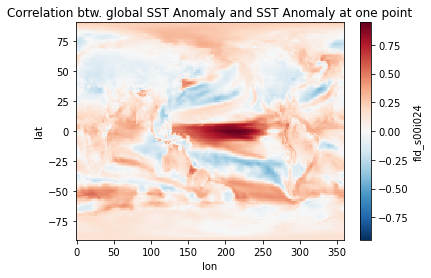

In [13]:
# calculate n34 and correlation plot
n34 = wgt_areaave(sst_anom, -5, 5, 190, 240)
sst_cor = corrrelation(sst_anom, n34, dims='time')
pc = sst_cor.plot()
pc.axes.set_title('Correlation btw. global SST Anomaly and SST Anomaly at one point')

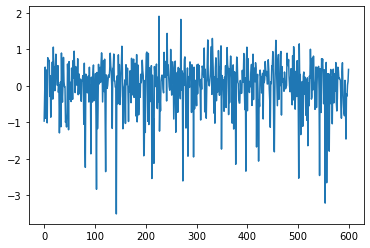

In [14]:
plt.plot(n34)